In [1]:
import mylibrary.nnlib as nn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Least squares

In [21]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
    c = (sy*sx2 - sx*sxy)/z
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output):
    return np.sqrt(np.square(target-output).mean())

In [22]:
# #Define a simple range of values for x and reshape so sklearn likes it.
# x = np.linspace(0,1,200)
# noise = np.random.normal(0,0.02, x.shape)
# x = x + noise
# y= 2.5*x + 0.5
# noise = np.random.normal(0,0.1, x.shape)
# y = y + noise
# x = x - x.mean()

In [39]:
#Define a simple range of values for x and reshape so sklearn likes it.
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
# x = x - x.mean()

In [40]:
x.mean()

0.4995405881172028

In [41]:
n = len(x)

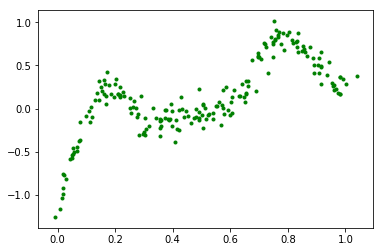

In [42]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [80]:
m = np.random.exponential()*2
c = np.random.randn()
print(m,c)
mt, mr = np.copy(m), np.copy(m)
ct, cr = np.copy(c), np.copy(c)

0.001778503691434195 0.11150845308596882


In [81]:
m, c = regression(x, y)
ytarg = m*x+c
learning_rate = 1

m, c

(1.0445819733760842, -0.3846109726308199)

In [82]:
mt = np.copy(m)
ct = 10

In [83]:
import collections

In [84]:
%matplotlib tk
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1,2,2)

plt.ion()
fig.show()
fig.canvas.draw()

range_ = 500
losscurv = collections.deque(maxlen=range_)
dmcurv = collections.deque(maxlen=range_)
dccurv = collections.deque(maxlen=range_)
ccurv = collections.deque(maxlen=range_)
mcurv = collections.deque(maxlen=range_)

# x_ = x - x.mean()

for step in range(1000000):
    # traditional first
    yt = mt*x + ct
    dyt = yt - y
    dct = dyt.mean()
    dmt = x.T.dot(dyt)/n
    
    yr = mr*x + cr
#     yr = mr*x_ + cr
#     yr = mr*x + ct
    dyr = yr - y
    
    dcr = dyr.mean()
    dmr = (1/x).T.dot(dyr)/n
    
    losscurv.append((dyr**2).mean())
    dmcurv.append(dmr)
    dccurv.append(dcr)
    mcurv.append(mr)
    ccurv.append(cr)
    
    if step%1==0:
        print('_______________________')
        print("epoch trad, rev", step)
        print("m  c", m, c)
        print("mt mr", mt, mr)
        print("ct cr", ct, cr)
        print("Loss", (dyt**2).mean(), (dyr**2).mean())
        print("dm  ", dmt, dmr)
        print("dc  ", dct, dcr)

        ax.clear()
        ax1.clear()
        ax.scatter(x, y, marker='.', c='g', label='x,y')
        ax.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
        ax.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
        ax.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
    #     plt.plot(x, np.zeros_like(x), c='b', lw=1)
        ax1.plot(losscurv, label='error')
        ax1.plot(dmcurv, label='dm', color='r')
        ax1.plot(dccurv, label='dc', color='orange')
        ax1.plot(mcurv, label='m', color='m', marker='_')
        ax1.plot(ccurv, label='c', color='y', marker='_')
        
        
        
        
        plt.legend()
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")


    mt = mt - learning_rate*dmt
    ct = ct - learning_rate*dct
#     mr = mr - learning_rate*dmr
#     cr = cr - learning_rate*dcr
###     the revised version does not seem to require learning rate
#     if step%2==0:
#         mr = mr - dmr
#     else:
#         cr = cr - dcr
    

    if (dyt**2).mean() < 0.0025:
        print('fitted to our expectation')
        plt.pause(10)
        break

_______________________
epoch trad, rev 0
m  c 1.0445819733760842 -0.3846109726308199
mt mr 1.0445819733760842 0.001778503691434195
ct cr 10 0.11150845308596882
Loss 107.92626804291778 0.1786380548400613
dm   5.187534672636356 1.9727512998068906
dc   10.384610972630819 -0.02480323282014096


_______________________
epoch trad, rev 1
m  c 1.0445819733760842 -0.3846109726308199
mt mr -4.142952699260272 0.001778503691434195
ct cr -0.3846109726308189 0.11150845308596882
Loss 9.07561196360123 0.1786380548400613
dm   -1.7329019545616478 1.9727512998068906
dc   -2.5913841212471453 -0.02480323282014096


_______________________
epoch trad, rev 2
m  c 1.0445819733760842 -0.3846109726308199
mt mr -2.4100507446986246 0.001778503691434195
ct cr 2.2067731486163265 0.11150845308596882
Loss 1.8440691033910033 0.1786380548400613
dm   0.14047749468577786 1.9727512998068906
dc   0.8656548615311758 -0.02480323282014096


_______________________
epoch trad, rev 3
m  c 1.0445819733760842 -0.384610972630819



_______________________
epoch trad, rev 27
m  c 1.0445819733760842 -0.3846109726308199
mt mr 0.37418050502832995 0.001778503691434195
ct cr -0.025791536779063474 0.11150845308596882
Loss 0.12467765329173783 0.1786380548400613
dm   -0.04470351352116693 1.9727512998068906
dc   0.02392669207868295 -0.02480323282014096


_______________________
epoch trad, rev 28
m  c 1.0445819733760842 -0.3846109726308199
mt mr 0.41888401854949686 0.001778503691434195
ct cr -0.04971822885774642 0.11150845308596882
Loss 0.11970730324026346 0.1786380548400613
dm   -0.04172260698159181 1.9727512998068906
dc   0.02233121943526906 -0.02480323282014096


_______________________
epoch trad, rev 29
m  c 1.0445819733760842 -0.3846109726308199
mt mr 0.46060662553108866 0.001778503691434195
ct cr -0.07204944829301548 0.11150845308596882
Loss 0.11537771561663447 0.1786380548400613
dm   -0.038940472375090705 1.9727512998068906
dc   0.020842135629367292 -0.02480323282014096


_______________________
epoch trad, rev 3



_______________________
epoch trad, rev 53
m  c 1.0445819733760842 -0.3846109726308199
mt mr 0.9331244983335207 0.001778503691434195
ct cr -0.32495551212772805 0.11150845308596882
Loss 0.08718866656361243 0.1786380548400613
dm   -0.007432174566800891 1.9727512998068906
dc   0.003977927870271219 -0.02480323282014096


_______________________
epoch trad, rev 54
m  c 1.0445819733760842 -0.3846109726308199
mt mr 0.9405566729003216 0.001778503691434195
ct cr -0.3289334399979993 0.11150845308596882
Loss 0.08705128278304511 0.1786380548400613
dm   -0.0069365844884296665 1.9727512998068906
dc   0.0037126728540894205 -0.02480323282014096


_______________________
epoch trad, rev 55
m  c 1.0445819733760842 -0.3846109726308199
mt mr 0.9474932573887513 0.001778503691434195
ct cr -0.3326461128520887 0.11150845308596882
Loss 0.0869316101020726 0.1786380548400613
dm   -0.006474041201892036 1.9727512998068906
dc   0.0034651054948748217 -0.02480323282014096


_______________________
epoch trad, rev 5



_______________________
epoch trad, rev 79
m  c 1.0445819733760842 -0.3846109726308199
mt mr 1.0260516309926155 0.001778503691434195
ct cr -0.374692964818929 0.11150845308596882
Loss 0.08615244604131325 0.1786380548400613
dm   -0.0012356348403185593 1.9727512998068906
dc   0.0006613496796398111 -0.02480323282014096


_______________________
epoch trad, rev 80
m  c 1.0445819733760842 -0.3846109726308199
mt mr 1.0272872658329342 0.001778503691434195
ct cr -0.3753543144985688 0.11150845308596882
Loss 0.08614864866226198 0.1786380548400613
dm   -0.0011532406013447542 1.9727512998068906
dc   0.0006172497548308658 -0.02480323282014096


_______________________
epoch trad, rev 81
m  c 1.0445819733760842 -0.3846109726308199
mt mr 1.028440506434279 0.001778503691434195
ct cr -0.37597156425339967 0.11150845308596882
Loss 0.0861453408297809 0.1786380548400613
dm   -0.0010763405507788846 1.9727512998068906
dc   0.0005760904882364378 -0.02480323282014096


_______________________
epoch trad, rev 

No handles with labels found to put in legend.


TclError: this isn't a Tk application

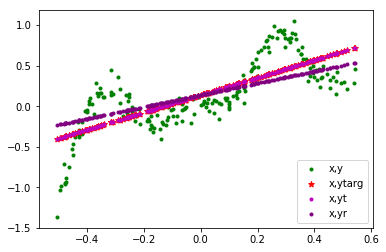

In [113]:
%matplotlib inline
plt.scatter(x, y, marker='.', c='g', label='x,y')
plt.scatter(x, ytarg, marker='*', c='r', lw=1, label='x,ytarg')
plt.scatter(x, yt, marker='.', c='m', lw=1, label='x,yt')
plt.scatter(x, yr, marker='.', c='purple', lw=1, label='x,yr')
plt.legend()

In [115]:
dxr = (1/mr)*(dyr)
dxr.mean()

1.7763568394002505e-17

In [54]:
# Debugging
print('trad       rev')

trad       rev


In [55]:
print(dmt, dmr)
print(dct, dcr)

-0.029160298680665366 -3.1433189384699746e-17
-1.3329387852412112e-06 8.43769498715119e-17


In [ ]:
t, r = dyt, dyr
print('delta y')
print('min',t.min(), r.min())
print('max',t.max(), r.max())
print('mean',t.mean(), r.mean())
print('std',t.std(), r.std())

In [ ]:
et, er = dyt**2, dyr**2
print('squared error')
print('min',et.min(), er.min())
print('max',et.max(), er.max())
print('mean',et.mean(), er.mean())
print('std',t.std(), r.std())

In [ ]:
# it is sure to work for only one point,, for vector ??

In [ ]:
yr = mr*x + cr
dyr = yr - y
dcr = dyr.mean()
dcr # >0 means that the y-intercept should be decreased in value, shift it below

In [ ]:
dmr = (1/x).T.dot(dyr)/n

In [ ]:
dmr_ = np.zeros_like(x)
for i in range(len(x)):
    dmr_[i]=1/x[i]*dyr[i]
dmr_

In [ ]:
dmr_.mean(), dmr

In [ ]:
## The error is due to the dy(gradient) reaching to values where it 